# Visit the Sage site for more info: https://sagecontinuum.org

This is a short notebook which shows how to grab a Sage workflow from the Edge Code Repository (ECR) and run it in a notebook.

This notebook runs on the `quay.io/jupyter/pytorch-notebook` container provided by Jupyter.

In [1]:
# Get the cloud cover repo
! git clone -q https://github.com/waggle-sensor/plugin-cloud-cover.git

In [2]:
# Install requirements (takes a few minutes if they dont already exist)
! pip install --no-cache-dir -q -r plugin-cloud-cover/requirements.txt
! pip install --no-cache-dir -q opencv-python-headless torch torchvision

In [3]:
# Download the model
! wget -q https://web.lcrc.anl.gov/public/waggle/models/Unet_epoch228a.pth -O wagglecloud_unet_300.pth

In [4]:
# Download an image of the sky
! wget -q https://raw.githubusercontent.com/waggle-sensor/plugin-cloud-cover/main/ecr-meta/ecr-science-image.jpg

In [5]:
# Modify os.environ to avoid an issue with the default cache dir
import os
os.environ["MPLCONFIGDIR"] = "./"

In [6]:
# Load the image
import cv2
image = cv2.imread("ecr-science-image.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

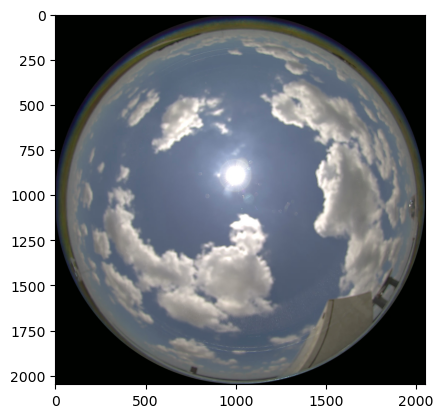

In [7]:
# View the image
import matplotlib.pyplot as plt
plt.imshow(image);

In [8]:
# Modify sys.path to access plugin-cloud-cover
import sys
plugin = "plugin-cloud-cover"
if plugin not in sys.path:
    sys.path.append(plugin)

In [9]:
# Create an instance of the model
from unet_module import Unet_Main
unet_main = Unet_Main()

In [10]:
# Run the model on our image
threshold = 0.9
ratio, hi = unet_main.run(image, out_threshold=threshold)

2048 2048
2048 2048


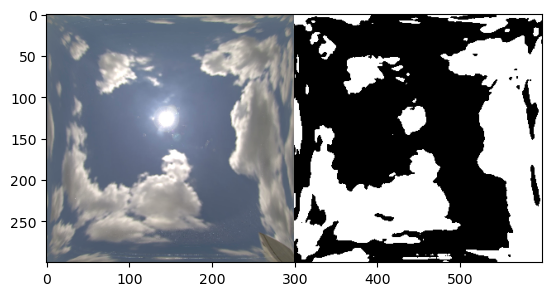

In [11]:
# View the result!
plt.imshow(hi);

Great! The image is reshaped into a format which is friendly to machine learning, and the model predicted which pixels are clouds (white) or not (black).

# End